In [29]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import pandas as pd

from glob import glob
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from model import Model

In [4]:
model_1 = tf.keras.models.load_model('model/resnet.h5')
model_2 = tf.keras.models.load_model('model/resnet_msrcr.h5')

In [5]:
gc_paths = glob('data/test/glaucoma/*')
nm_paths = glob('data/test/normal/*')

len(gc_paths), len(nm_paths)

(187, 189)

In [6]:
def predicts(model, filepaths):
    print('There are', len(filepaths), 'predictions.')
    result = []

    for filepath in filepaths:
        img = cv.imread(filepath)
        img = cv.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        prediction = round(prediction[0][0])

        result.append(prediction)
    return result

In [23]:
gc_model_1 = predicts(model_1, gc_paths)
nm_model_1 = predicts(model_1, nm_paths)

gc_model_1_true = np.zeros_like(gc_model_1)
nm_model_1_true = np.ones_like(nm_model_1)

gc_model_2 = predicts(model_2, gc_paths)
nm_model_2 = predicts(model_2, nm_paths)

gc_model_2_true = np.zeros_like(gc_model_2)
nm_model_2_true = np.ones_like(nm_model_2)

There are 187 predictions.
1/1 [==============================] - 0s 273ms/step
There are 189 predictions.
1/1 [==============================] - 0s 300ms/step
There are 187 predictions.
1/1 [==============================] - 0s 435ms/step
There are 189 predictions.
1/1 [==============================] - 1s 501ms/step


In [ ]:
model_1_pred = np.concatenate([gc_model_1, nm_model_1])
model_1_true = np.concatenate([gc_model_1_true, nm_model_1_true])
model_2_pred = np.concatenate([gc_model_2, nm_model_2])
model_2_true = np.concatenate([gc_model_2_true, nm_model_2_true])

In [24]:
cf_1 = confusion_matrix(model_1_true, model_1_pred)
cf_2 = confusion_matrix(model_2_true, model_2_pred)

In [25]:
cf_1

array([[101,  86],
       [  1, 188]], dtype=int64)

In [26]:
cf_2

array([[147,  40],
       [ 70, 119]], dtype=int64)

Model ResNet

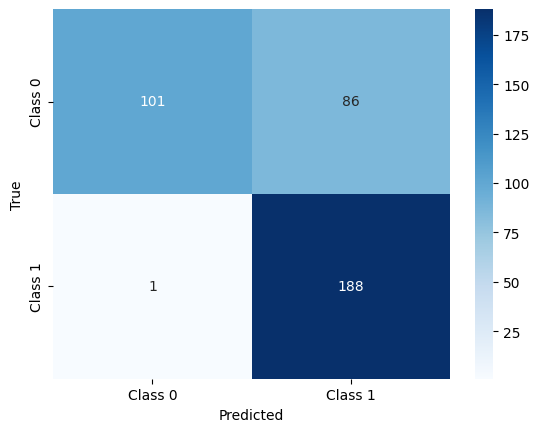

In [31]:
# Sak elengku indeks 0 ki Glaucoma, 1 Normal
# Lak salah ganti en
labels = ['Glaucoma', 'Normal']  # Label kelas
sns.heatmap(cf_1, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Model ResNet + MSRCR

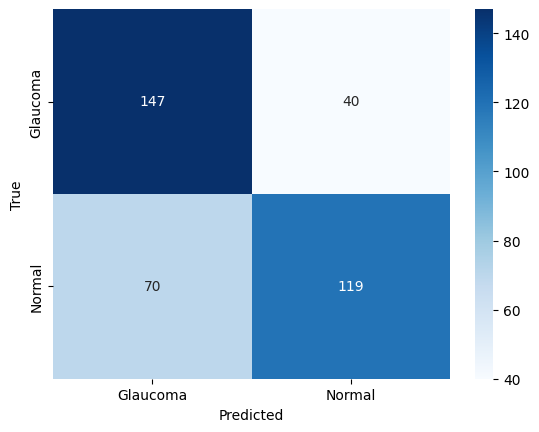

In [32]:
# Sak elengku indeks 0 ki Glaucoma, 1 Normal
# Lak salah ganti en
labels = ['Glaucoma', 'Normal']  # Label kelas
sns.heatmap(cf_2, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()